# TFG: Mantenimiento predictivo
# *Machine Learning* para la detección automatizada de fallos

## Preparación

Lo primero que se debe hacer es preparar las herramientas que se van a emplear en el código asociado al TFG. En primer lugar, se da acceso a Drive al documento de Colaboratory. Es necesario iniciar sesión con la cuenta de correo electrónico que cada uno tenga asociada a su propio Drive. Al ejecutar la primera línea de código, se debe hacer click en el enlace que aparece y copiar un código personal que cambia en cada ejecución.

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Una vez salga la confirmación de "Drive mounted", importamos las librerías de Python que necesitaremos y cargamos los *dataframes* con los datos proporcionados por Scania.



In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Trabajo de Fin de Grado - Diego José Sánchez Martín/aps_failure_training_set.csv',\
                 na_values = 'na',\
                 converters={'class': lambda x: True if x == 'pos' else False})
dftest = pd.read_csv('/content/drive/Shareddrives/Trabajo de Fin de Grado - Diego José Sánchez Martín/aps_failure_test_set.csv',\
                 na_values = 'na',\
                 converters={'class': lambda x: True if x == 'pos' else False})

RealResult=np.array(dftest['class'],dtype='int')


Podemos ver la información básica sobre df, que tiene 60000 filas y 171 columnas (170 variables y la etiqueta True o False)

In [ ]:
df.info

<bound method DataFrame.info of        class  aa_000  ab_000        ac_000  ...    ee_008    ee_009  ef_000  eg_000
0      False   76698     NaN  2.130706e+09  ...   73224.0       0.0     0.0     0.0
1      False   33058     NaN  0.000000e+00  ...   97576.0    1500.0     0.0     0.0
2      False   41040     NaN  2.280000e+02  ...   95128.0     514.0     0.0     0.0
3      False      12     0.0  7.000000e+01  ...       0.0       0.0     4.0    32.0
4      False   60874     NaN  1.368000e+03  ...  433954.0    1218.0     0.0     0.0
...      ...     ...     ...           ...  ...       ...       ...     ...     ...
59995  False  153002     NaN  6.640000e+02  ...  898642.0   28588.0     0.0     0.0
59996  False    2286     NaN  2.130707e+09  ...       0.0       0.0     0.0     0.0
59997  False     112     0.0  2.130706e+09  ...       0.0       0.0     0.0     0.0
59998  False   80292     NaN  2.130706e+09  ...  802280.0  388422.0     0.0     0.0
59999  False   40222     NaN  6.980000e+02  

## Descripción de los datos

En primer lugar, vamos a observar cómo se distribuyen los valores NaN

In [ ]:
NaTot=df.isna().sum()

In [ ]:
NumNaNs=NaTot.sum()
PorcentajeNaNs=NaTot.sum()/(60000*171)*100

Text(0.5, 1.0, 'Distribución de valores NaN en $\\it{training \\ set}$')

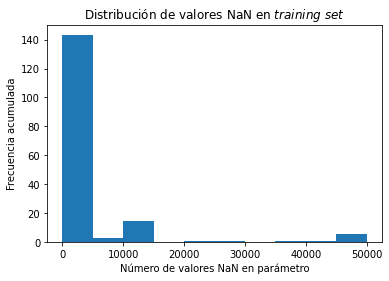

In [ ]:
plt.hist(NaTot, bins=np.linspace(0,50000,11))
plt.xlabel('Número de valores NaN en parámetro')
plt.ylabel('Frecuencia acumulada')
plt.title('Distribución de valores NaN en $\it{training \ set}$')

In [ ]:
maskpos = df['class']==True
dfpos=df[maskpos]

In [ ]:
NaPos=dfpos.isna().sum()
NumNaNsPos=NaPos.sum()
PorcentajeNaNsPos=NaPos.sum()/(60000*171)*100

Text(0.5, 1.0, 'Distribución de valores NaN en ejemplos de fallos del $\\it{training \\ set}$')

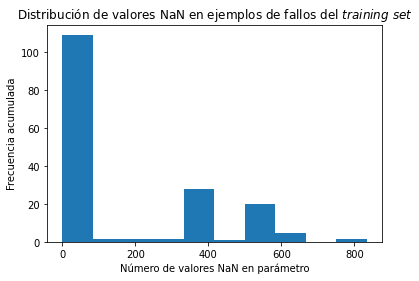

In [ ]:
plt.hist(NaPos, bins=np.linspace(0,50000/60,11))
plt.xlabel('Número de valores NaN en parámetro')
plt.ylabel('Frecuencia acumulada')
plt.title('Distribución de valores NaN en ejemplos de fallos del $\it{training \ set}$')

Se puede observar que, en caso de fallos en los camiones (equivalente a que la clase de un evento sea True), la distribución de los valores NaN es diferente.

A continuación, hagamos un estudio cualitativo de los datos que pertenecen a histogramas.

In [ ]:
hist_col_root = [c[:2] for c in df.columns if '1' in c]

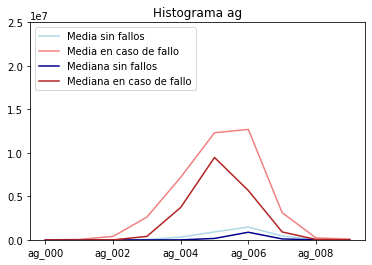

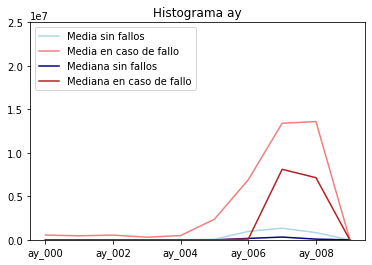

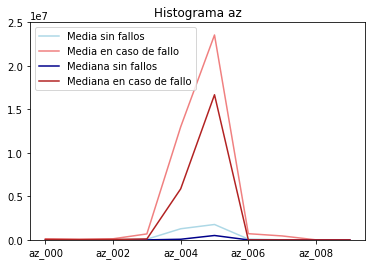

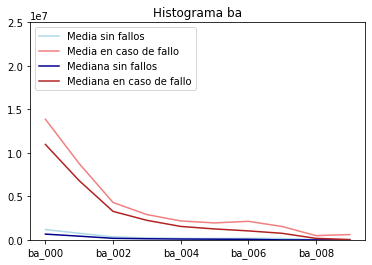

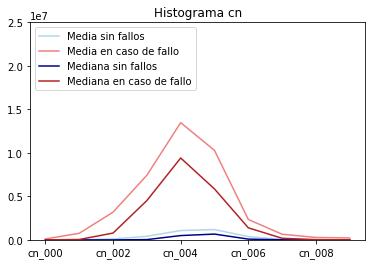

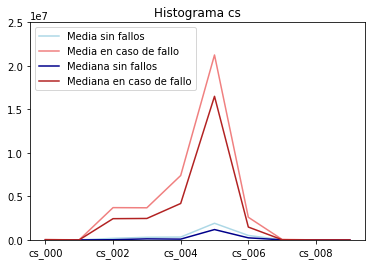

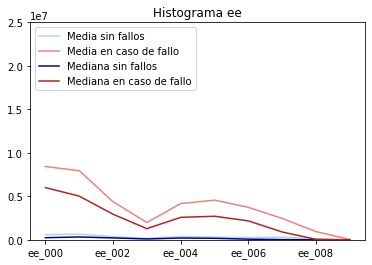

In [ ]:
for root in hist_col_root:
    hist_col_select = ['class']+[c for c in df.columns if c[0:2]==root]
    dfh = df[hist_col_select]
    ax = dfh.groupby('class').mean().T.plot(color=['lightblue','lightcoral'])
    display(dfh.groupby('class').median().T.plot(color=['darkblue','firebrick'], ax=ax, title='Histograma '+root, ylim=(0,2.5e7)).legend(['Media sin fallos','Media en caso de fallo','Mediana sin fallos','Mediana en caso de fallo'], loc=2))

## Sustitución de los valores NaN

Se emplean diversas técnicas para sustituir los valores NaN. La aplicación del *iterative imputer* lleva varios minutos.



In [ ]:
dfmean=df.fillna(df.mean())
from sklearn.impute import SimpleImputer
impmf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfmostfrequent=pd.DataFrame(impmf.fit_transform(df))
columnsnames=np.array(df.columns)
dfmostfrequent.columns=columnsnames
dftestmean=dftest.fillna(dftest.mean())
dftestmostfrequent=pd.DataFrame(impmf.fit_transform(dftest))
dftestmostfrequent.columns=columnsnames

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impII_10 = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=10)
impII_20 = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=20)
dfII_10=pd.DataFrame(impII_10.fit_transform(df), columns=df.columns)
dfII_20=pd.DataFrame(impII_20.fit_transform(df), columns=df.columns)
dftestII_10=pd.DataFrame(impII_10.fit_transform(dftest), columns=dftest.columns)
dftestII_20=pd.DataFrame(impII_20.fit_transform(dftest), columns=dftest.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


## Predicción de resultados: iteración 1

Utilizamos diferentes algoritmos de machine learning para calcular la función de coste resultante de hacer una predicción para el *test set*. Cada ejecución de las funciones cuyo nombre empieza por "PredictFallos" lleva unos 15 minutos.

In [ ]:
OptionsMLmethod=np.array(['svm','svmsigmoid','RF','LR'])
OptionsNanFiller=np.array(['mean','mostfrequent','II con n=10','II con n=20'])
Optionsdf_pred=np.array(['Datos brutos', 'Eliminar columnas problemáticas', 'Contar NaNs', 'Eliminar columnas problemáticas + Contar NaNs'])

In [ ]:
def PredictFallosCompleto():
  M_cost=np.zeros((4, 4))
  M_FalsePos=np.zeros((4, 4))
  M_FalseNeg=np.zeros((4, 4))

  for MLmethod in OptionsMLmethod:
    print('Estamos usando un nuevo MLMethod')
    for NanFiller in OptionsNanFiller: 
      if NanFiller=='mean':
        df=dfmean
        dftest=dftestmean
        i=0
      if NanFiller=='mostfrequent':
        df=dfmostfrequent
        dftest=dftestmostfrequent
        i=1
      if NanFiller=='II con n=10':
        df=dfII_10
        dftest=dftestII_10
        i=2
      if NanFiller=='II con n=20':
        df=dfII_20
        dftest=dftestII_20
        i=3
  
    
      X=df.drop('class', axis=1)
      y=df['class']
      yarr=np.array(y,dtype='int')

      if MLmethod=='svm':
        from sklearn import svm
        clf = svm.SVC()
        j=0
    
      if MLmethod=='svmsigmoid':
        from sklearn import svm
        clf = svm.SVC(kernel= 'sigmoid', coef0=0.25)
        j=1
    
      if MLmethod=='RF':
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier()
        j=2

      if MLmethod=='LR':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression(random_state=0, max_iter=1000)
        j=3
    

      clf.fit(X, yarr)
      dftestfin=dftest.drop('class', axis=1)
      Prediction=clf.predict(dftestfin)
      Comp=RealResult-Prediction
      FalseNeg=np.count_nonzero(Comp == 1)
      FalsePos=np.count_nonzero(Comp == -1)
      NumErrores=FalseNeg+FalsePos
      Cost=10*FalsePos+500*FalseNeg

      M_cost[i,j]=Cost
      M_FalsePos[i,j]=FalsePos
      M_FalseNeg[i,j]=FalseNeg

  return M_cost, M_FalsePos, M_FalseNeg

In [ ]:
M_cost, M_FalsePos, M_FalseNeg=PredictFallosCompleto()

Estamos usando un nuevo MLMethod
Estamos usando un nuevo MLMethod
Estamos usando un nuevo MLMethod
Estamos usando un nuevo MLMethod


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
Optionsdf=np.array(['DB', 'EC', '#NaNs', 'EC+#NaNs'])
Columnas=np.array(['SVM', 'SVM Sigmoid', 'Random Forest', 'Logistic Regression'])
Filas=np.array(['Media', 'Más frecuente', 'II con n=10', 'II con n=20'])

Text(0.5, 1.0, 'Función de coste para diferentes algoritmos de predicción')

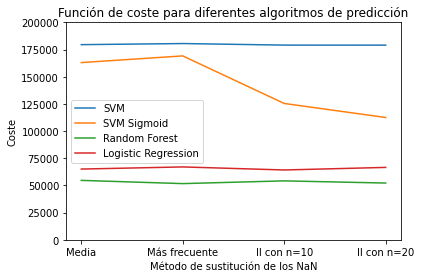

In [ ]:
plt.plot(Filas,M_cost)
plt.legend(Columnas, loc='best')
plt.xlabel('Método de sustitución de los NaN')
plt.ylim([0,200000])
plt.ylabel('Coste')
plt.title('Función de coste para diferentes algoritmos de predicción')

In [ ]:
def PredictFallos_Change_df():
  M_cost_cdf=np.zeros((4, 4))
  M_FalsePos_cdf=np.zeros((4, 4))
  M_FalseNeg_cdf=np.zeros((4, 4))

  for MLmethod in OptionsMLmethod:
    print('Estamos usando un nuevo MLMethod')
    for o in Optionsdf_pred: 
      if o =='Datos brutos':
        df1=dfmean
        dftest1=dftestmean
        i=0
      if o=='Eliminar columnas problemáticas':
        df=dfmean
        dftest=dftestmean
        df1=df.drop(CtoRemove, axis=1)
        dftest1=dftest.drop(CtoRemove, axis=1)
        i=1
      if o=='Contar NaNs':
        df1=dfmean
        dftest1=dftestmean
        df1['Number of NaNs']=CountNaNs
        dftest1['Number of NaNs']=CountNaNstest
        i=2
      if o=='Eliminar columnas problemáticas + Contar NaNs':
        df=dfmean
        dftest=dftestmean
        df1=df.drop(CtoRemove, axis=1)
        dftest1=dftest.drop(CtoRemove, axis=1)
        df1['Number of NaNs']=CountNaNs
        dftest1['Number of NaNs']=CountNaNstest
        i=3
    
      X=df1.drop('class', axis=1)
      y=df1['class']
      yarr=np.array(y,dtype='int')

      if MLmethod=='svm':
        from sklearn import svm
        clf = svm.SVC()
        j=0
    
      if MLmethod=='svmsigmoid':
        from sklearn import svm
        clf = svm.SVC(kernel= 'sigmoid', coef0=0.25)
        j=1
    
      if MLmethod=='RF':
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier()
        j=2

      if MLmethod=='LR':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression(random_state=0, max_iter=1000)
        j=3
    

      clf.fit(X, yarr)
      dftestfin=dftest1.drop('class', axis=1)
      Prediction=clf.predict(dftestfin)
      Comp=RealResult-Prediction
      FalseNeg=np.count_nonzero(Comp == 1)
      FalsePos=np.count_nonzero(Comp == -1)
      NumErrores=FalseNeg+FalsePos
      Cost=10*FalsePos+500*FalseNeg

      M_cost_cdf[i,j]=Cost
      M_FalsePos_cdf[i,j]=FalsePos
      M_FalseNeg_cdf[i,j]=FalseNeg

  return M_cost_cdf, M_FalsePos_cdf, M_FalseNeg_cdf

In [ ]:
M_cost_cdf, M_FalsePos_cdf, M_FalseNeg_cdf=PredictFallos_Change_df()

In [ ]:
plt.plot(Optionsdf,M_cost_cdf)
plt.legend(Columnas, loc='best')
plt.xlabel('Tratamiento de datos')
plt.ylim([0,200000])
plt.ylabel('Coste')
plt.title('Función de coste para diferentes formas de tratar datos')

A la vista de los resultados anteriores, se prueban los algoritmos LR y RF eliminando una cantidad sucesiva de columnas en función de su porcentaje de NaNs.

In [ ]:
UmbralesNaN=np.array([50, 25, 20, 10, 7.5, 5, 4, 3, 2, 1, 0.5, 0.1])
OptionsMLmethod2=np.array(['RF','LR'])
Na1=df.isna().sum()/60000*100

In [ ]:
def PredictFallos_EliminamosNaN():
  a=len(UmbralesNaN)
  M_cost_N=np.zeros((a, 2))
  M_mejora_N=np.zeros((a, 2))

  for MLmethod in OptionsMLmethod2:
    print('Estamos usando un nuevo MLMethod')
    i=0
    for U in UmbralesNaN:
      NatoRemove=Na1[Na1>U]
      CtoRemove=NatoRemove.index
      df=dfmean
      dftest=dftestmean
      df1=df.drop(CtoRemove, axis=1)
      dftest1=dftest.drop(CtoRemove, axis=1)

      X=df1.drop('class', axis=1)
      y=df1['class']
      yarr=np.array(y,dtype='int')
    
      if MLmethod=='RF':
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier()
        j=0

      if MLmethod=='LR':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression(random_state=0, max_iter=1000)
        j=1
    
      clf.fit(X, yarr)
      dftestfin=dftest1.drop('class', axis=1)
      Prediction=clf.predict(dftestfin)
      Comp=RealResult-Prediction
      FalseNeg=np.count_nonzero(Comp == 1)
      FalsePos=np.count_nonzero(Comp == -1)
      Cost=10*FalsePos+500*FalseNeg

      M_cost_N[i,j]=Cost
      i=i+1

  return M_cost_N

In [ ]:
M_cost_N=PredictFallos_EliminamosNaN()

Estamos usando un nuevo MLMethod
Estamos usando un nuevo MLMethod


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Text(0.5, 1.0, 'Función de coste según NaNs eliminados')

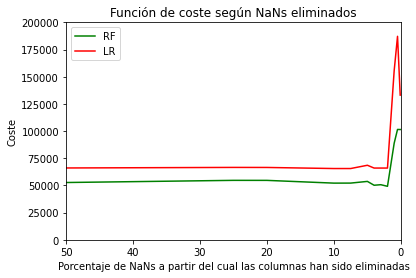

In [ ]:
plt.plot(UmbralesNaN,M_cost_N[:,0],color='green')
plt.plot(UmbralesNaN,M_cost_N[:,1],color='red')
plt.legend(OptionsMLmethod2, loc='best')
plt.xlabel('Porcentaje de NaNs a partir del cual las columnas han sido eliminadas')
plt.ylim([0,200000])
plt.xlim([0,50])
plt.ylabel('Coste')
plt.gca().invert_xaxis()
plt.title('Función de coste según NaNs eliminados')

A la vista de los resultados obtenidos, a partir de ahora se trabajará con las variables que presentan menos de un 2% de valores NaN y empleando la imputación media. Además, el algoritmo elegido para la construcción del modelo es *Random Forest* debido a su mejor rendimiento a la hora de minimizar la función de coste.

In [ ]:
Na1_2=Na1[Na1>2]
CtoRemove=Na1_2.index
df1=df.drop(CtoRemove, axis=1)
dftest1=dftest.drop(CtoRemove, axis=1)
columnsnames=np.array(df1.columns)
df1mean=df1.fillna(df1.mean())
dftest1mean=dftest1.fillna(dftest1.mean())
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## Afinado de modelo

En primer lugar se efectúa una cross-validation dividiendo el *training set* en 6 partes. Cada una de ellas necesita de unos 5 minutos para ejecutarse.

In [ ]:
from sklearn.model_selection import cross_val_score
X=df1mean.drop('class', axis=1)
y=df1mean['class']
dftestfin=dftest1mean.drop('class', axis=1)

def my_custom_cost_func(y_true, y_pred):
  Comp = np.array(y_true,dtype='int')-np.array(y_pred,dtype='int')
  FalseNeg=np.count_nonzero(Comp == 1)
  FalsePos=np.count_nonzero(Comp == -1)
  Cost=10*FalsePos+500*FalseNeg
  return Cost

from sklearn.metrics import make_scorer
score_cost = make_scorer(my_custom_cost_func, greater_is_better=False)
from sklearn.metrics import f1_score, balanced_accuracy_score

In [ ]:
scores = cross_val_score(clf, X, y, cv=6)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.9938 accuracy with a standard deviation of 0.0004


In [ ]:
scores2 = cross_val_score(clf, X, y, cv=6, scoring='f1')
print("%0.2f mean with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.79 mean with a standard deviation of 0.02


In [ ]:
scores3 = cross_val_score(clf, X, y, cv=6, scoring='balanced_accuracy')
print("%0.2f mean with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

In [ ]:
scores4 = cross_val_score(clf, X, y, cv=6, scoring=score_cost)
print("%0.2f mean with a standard deviation of %0.2f" % (-scores4.mean(), scores4.std()))

A continuación, se usa tanto GridSearch como RandomizedSearchCV para buscar los parámetros que optimizan el algoritmo. Estas búsquedas son computacionalmente costosas: algunas de ellas requieren cerca de una hora de cálculo.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'warm_start':(True, False), 'class_weight':('balanced', 'balanced_subsample')}
parameters2 = {'criterion':('gini', 'entropy'), "max_features":('sqrt', 'log2')}

GS = GridSearchCV(clf, parameters)
GS2 = GridSearchCV(clf, parameters2)

In [ ]:
Buscamos=GS.fit(X, yarr)
Buscamos2=GS2.fit(X, yarr)

In [ ]:
Buscamos.best_params_

In [ ]:
Buscamos2.best_params_

{'criterion': 'gini', 'max_features': 'sqrt'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={'min_samples_split':[2, 4, 6], 'min_samples_leaf':[1, 2, 3]}
param2={'max_leaf_nodes':[6, 8, 10], 'oob_score':(True, False)}
RS = RandomizedSearchCV(clf, param, random_state=0)
RS2 = RandomizedSearchCV(clf, param2, random_state=0)

In [ ]:
BuscamosRS=RS.fit(X, yarr)
BuscamosRS2=RS2.fit(X, yarr)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
BuscamosRS.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 4}

In [ ]:
BuscamosRS2.best_params_

{'max_leaf_nodes': 10, 'oob_score': False}

Juntamos todos los parámetros que han resultado beneficiosos y que son diferentes de la configuración por defecto

In [ ]:
CLF = RandomForestClassifier(min_samples_split= 4, warm_start= False)
X=df1mean.drop('class', axis=1)
y=df1mean['class']
yarr=np.array(y,dtype='int')

In [ ]:
CLF.fit(X, yarr)
Prediction=CLF.predict(dftestfin)
Comp=RealResult-Prediction
FalseNeg=np.count_nonzero(Comp == 1)
FalsePos=np.count_nonzero(Comp == -1)
NumErrores=FalseNeg+FalsePos
Cost=10*FalsePos+500*FalseNeg

display(str(Cost))

'51690'

## Análisis cualitativo

Vamos a ver la importancia de las diferentes variables. En primer lugar veremos cómo se distribuye esa importancia y a continuación se representará la importancia relativa del top 20.




In [ ]:
a=CLF.feature_importances_

(0.0, 0.045)

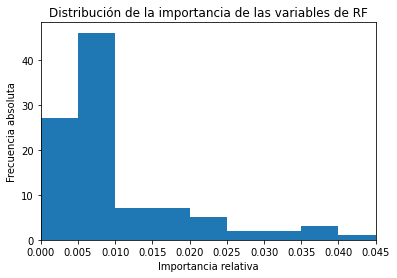

In [ ]:
plt.hist(a, bins=[0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045])
plt.xlabel("Importancia relativa")
plt.ylabel("Frecuencia absoluta")
plt.title('Distribución de la importancia de las variables de RF')
plt.xlim([0,0.045])

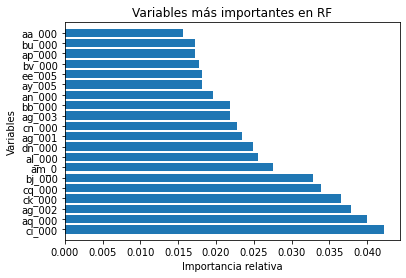

In [ ]:
features = list(zip(a,df1mean.columns[1:]))
def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(range(n_features), [f[0] for f in features], align='center')
    plt.yticks(range(n_features), [f[1] for f in features])
    plt.xlabel("Importancia relativa")
    plt.ylabel("Variables")
    plt.ylim(-1, n_features)
    plt.title('Variables más importantes en RF')

plot_feature_importances(clf,sorted(features,reverse=True)[0:20])

También se van a dibujar los árboles de decisión que está generando *Random Forest*

In [ ]:
columnsnames2=np.array(X.columns)

In [ ]:
# Extract single tree
estimator = CLF.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = columnsnames2,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

Como el árbol anterior es tan grande, se realiza la misma operación pero truncándolo a sus niveles superiores.

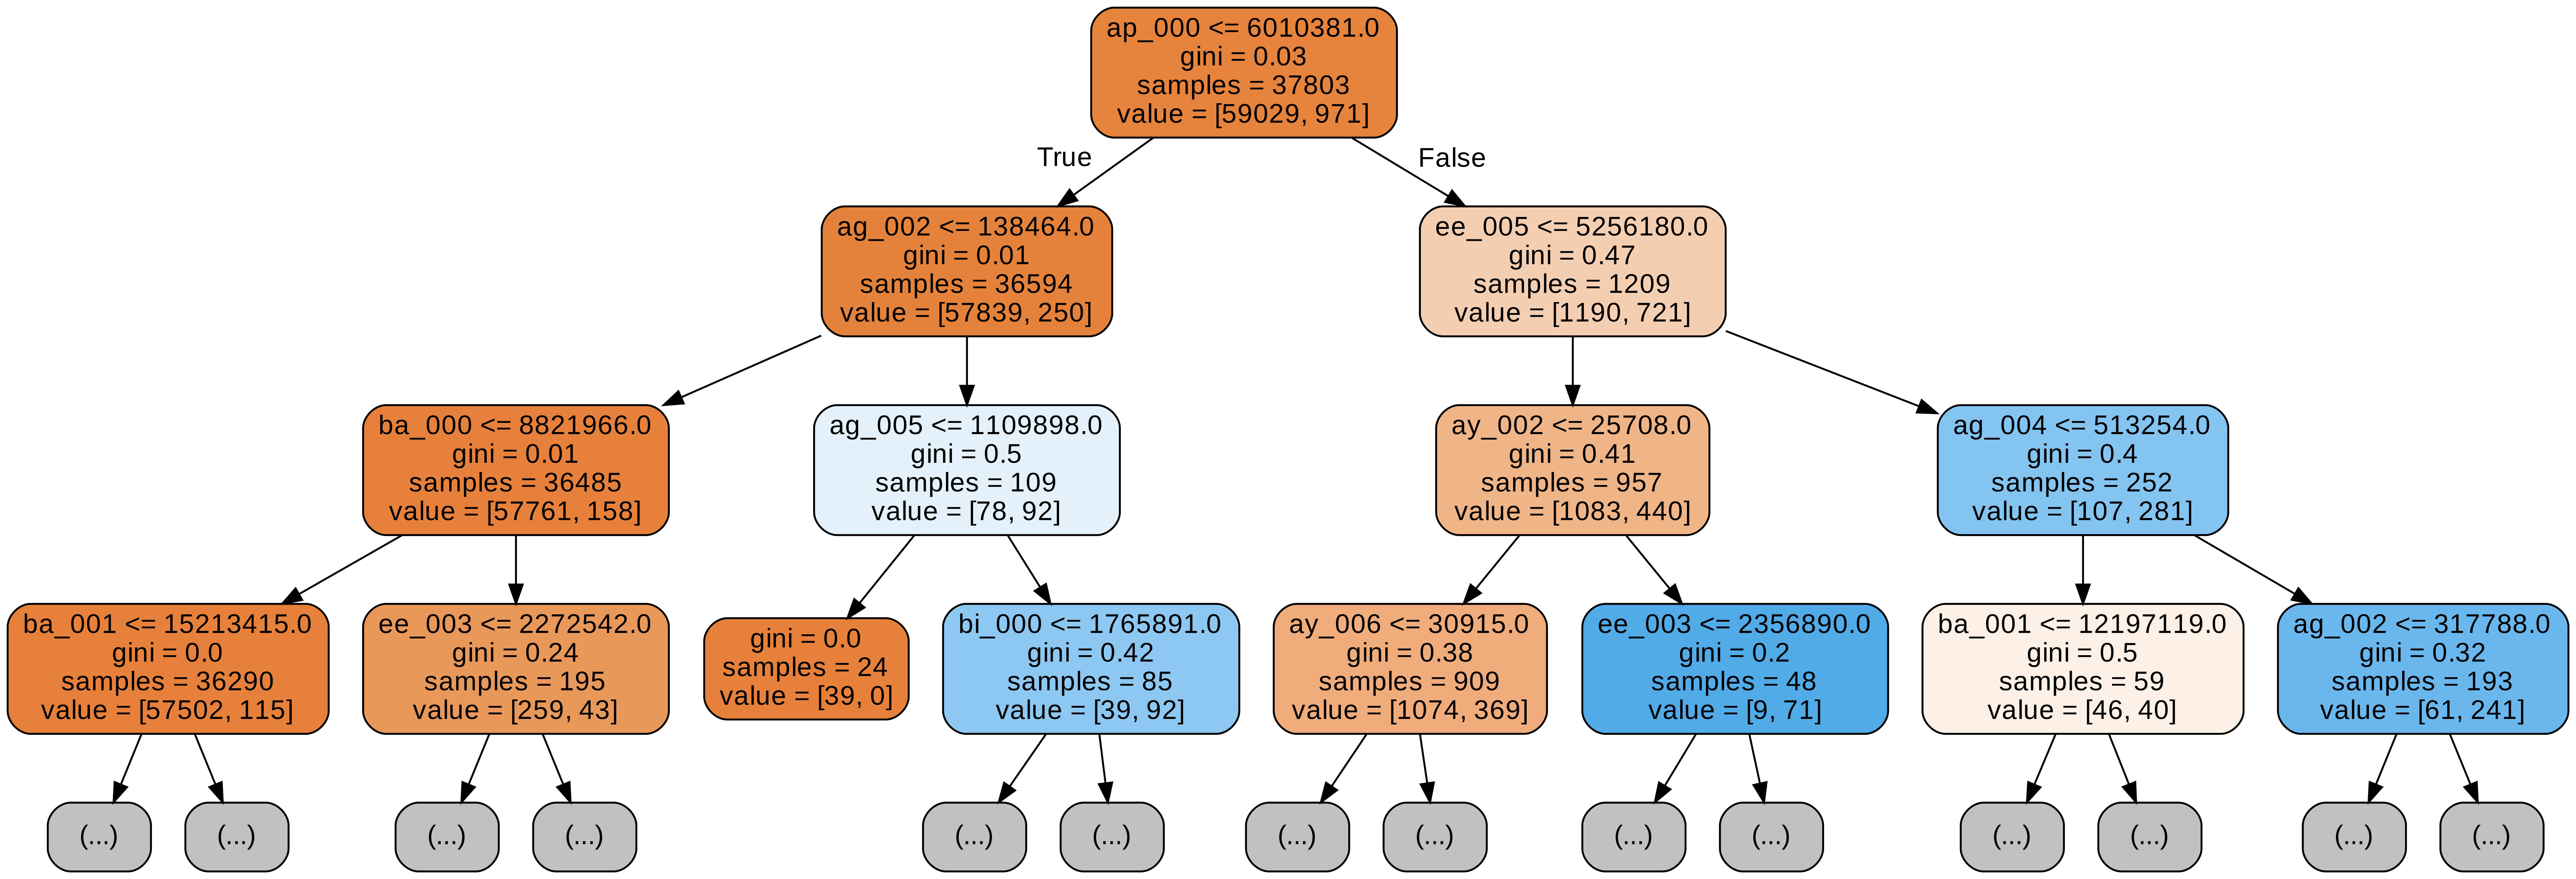

In [ ]:
# Extract single tree
estimator = CLF.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_truncado.dot', 
                feature_names = columnsnames2,
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth=3)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_truncado.dot', '-o', 'tree_truncado.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_truncado.png')

#Ajuste para el caso de estudio

Ahora vamos a calcular cómo varía RF cuando se cambia el umbral de probabilidad para definir un resultado como positivo. Tomaremos diez valores para cada umbral y haremos la media. Cabe destacar que la ejecución de la función CostesMedios, que realiza la representación gráfica de las predicciones, lleva unos 12 minutos.

In [ ]:
def CustomPred(T,P):
  n=dftestfin.shape[0]
  CPred=np.zeros(n)
  for i in range(n):
    if P[i,1]>T:
      CPred[i]=1
  
  return CPred

In [ ]:

def my_custom_cost_func(y_true, y_pred):
  Comp = np.array(y_true,dtype='int')-np.array(y_pred,dtype='int')
  FalseNeg=np.count_nonzero(Comp == 1)
  FalsePos=np.count_nonzero(Comp == -1)
  Cost=10*FalsePos+500*FalseNeg
  return Cost,FalseNeg,FalsePos

In [ ]:
def Pred_segun_umbral(Ts,P):
  L=len(Ts)
  Costs=np.zeros(L)
  FalseNeg=np.zeros(L)
  FalsePos=np.zeros(L)
  for j in range(L):
    y_pred=CustomPred(Ts[j],P)
    Costs[j],FalseNeg[j],FalsePos[j]=my_custom_cost_func(RealResult, y_pred)
  return Costs,FalseNeg,FalsePos

In [ ]:
CLF.fit(X, yarr)
P=CLF.predict_proba(dftestfin)

In [ ]:
def Tabla_Pred(n,Ts):
  L=len(Ts)
  Tabla=np.zeros((n,L))
  FN=np.zeros((n,L))
  FP=np.zeros((n,L))
  for i in range(n):
    CLF.fit(X, yarr)
    P=CLF.predict_proba(dftestfin)
    Costs,FalseNeg,FalsePos=Pred_segun_umbral(Ts,P)
    Tabla[i,:]=Costs
    FN[i,:]=FalseNeg
    FP[i,:]=FalsePos
  return Tabla,FN,FP

In [ ]:
Ts1=np.array([0,0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
Ts2=np.linspace(0, 0.2, num=21)

In [ ]:
def CostesMedios(n,Ts):
  Tabla,FN,FP=Tabla_Pred(n,Ts)
  L=len(Ts)
  Media=np.zeros(L)
  Desv=np.zeros(L)
  for j in range(L):
    vect=Tabla[:,j]
    Media[j]=np.mean(vect)
    Desv[j]=np.std(vect)
  plt.errorbar(Ts,Media,yerr=Desv,ecolor='r')
  plt.xlabel('Umbral de probabilidad a partir del cual se ha considerado evento positivo')
  plt.ylabel('Coste')
  plt.title('Función de coste en función de umbral para positivo')
  return Media, Desv, FN, FP

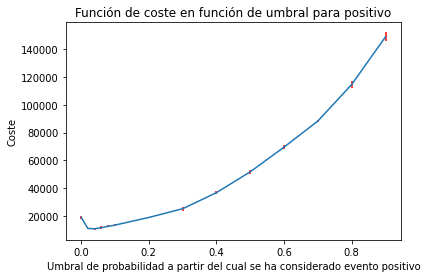

In [ ]:
Media1,Desv1,FN1,FP1=CostesMedios(10,Ts1)

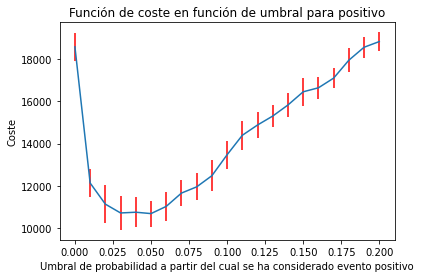

In [ ]:
Media2,Desv2,FN2,FP2=CostesMedios(10,Ts2)

## Distintas funciones de coste

En esta última sección se compara el rendimiento de nuestro modelo predictivo definitivo y su versión estándar (sin ajustar el umbral de probabilidad para considerar positivo un ejemplo determinado). Para ello, se toman diversas funciones score.

In [ ]:
def CLF_ajustado(X,yarr,T):
  CLF.fit(X, yarr)
  P=CLF.predict_proba(dftestfin)
  R=CustomPred(T,P)
  return R


In [ ]:
y_pred=CLF_ajustado(X,yarr,0.04)
y_pred_base=CLF_ajustado(X,yarr,0.5)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.metrics.cluster import v_measure_score

In [ ]:
a1=accuracy_score(RealResult, y_pred_base)
a2=accuracy_score(RealResult, y_pred)
b1=f1_score(RealResult, y_pred_base)
b2=f1_score(RealResult, y_pred)
c1=balanced_accuracy_score(RealResult, y_pred_base)
c2=balanced_accuracy_score(RealResult, y_pred)
d1=v_measure_score(RealResult, y_pred_base)
d2=v_measure_score(RealResult, y_pred)

In [ ]:
data = {'Función score': ['accuracy_score', 'f1_score', 'balanced_accuracy_score', 'v_measure_score'], 'Random Forest estándar': [a1, b1, c1, d1], 'Random Forest ajustado': [a2, b2, c2, d2]}  
df_comparando_scores = pd.DataFrame(data)
print(df_comparando_scores)

             Función score  Random Forest estándar  Random Forest ajustado
0           accuracy_score                0.992500                0.969375
1                 f1_score                0.819820                0.594371
2  balanced_accuracy_score                0.863424                0.963499
3          v_measure_score                0.677581                0.428848
